In [63]:
import pandas as pd
import numpy as np

Player_Stats_Final = pd.read_csv('VLR_ML.csv')
Player_Stats_Final = Player_Stats_Final.drop(Player_Stats_Final.columns[0], axis=1)
Player_Stats_Final = Player_Stats_Final.sort_values('Date')

Player_Stats_Final

,Date,Map,Player,Agent,Kills,Team,Kills_opposing_avg_3,Rating_opposing_avg_3,ACS_opposing_avg_3,Assists_opposing_avg_3,...,Last7_SemiBuy_By_Player,Last_Match_SemiBuy_By_Player,Last3_Avg_Full_Buy_By_Player_by_Role,Last5_Avg_Full_Buy_By_Player_by_Role,Last7_Avg_Full_Buy_By_Player_by_Role,Last3_Full_Buy_By_Player,Last5_Full_Buy_By_Player,Last7_Full_Buy_By_Player,Last_Match_Full_Buy_By_Player,Num_Matches
33914,2021-04-01 14:40:00,Bind,Sayf,Killjoy,9.0,GLD,12.700000,0.813000,176.400000,4.2,...,0.511111,0.800000,0.568735,0.568735,0.568735,0.568735,0.568735,0.568735,0.294118,38
38211,2021-04-01 14:40:00,Split,TakaS,Jett,22.0,OPP,14.700000,0.841000,187.000000,5.3,...,0.575000,0.400000,0.637821,0.637821,0.637821,0.637821,0.637821,0.637821,0.692308,57
38212,2021-04-01 14:40:00,Bind,TakaS,Raze,17.0,OPP,14.700000,0.841000,187.000000,5.3,...,0.716667,1.000000,0.604701,0.604701,0.604701,0.604701,0.604701,0.604701,0.538462,57
67551,2021-04-01 14:40:00,Bind,rodeN,Sova,19.0,OPP,14.700000,0.841000,187.000000,5.3,...,0.716667,1.000000,0.637821,0.637821,0.637821,0.604701,0.604701,0.604701,0.538462,50
33913,2021-04-01 14:40:00,Split,Sayf,Cypher,22.0,GLD,12.700000,0.813000,176.400000,4.2,...,0.366667,0.400000,0.706044,0.706044,0.706044,0.706044,0.706044,0.706044,0.769231,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35001,2023-05-17 14:00:00,Lotus,Shao,Sova,15.0,NAVI,11.800000,0.797333,162.300000,4.8,...,0.624939,0.555556,0.380051,0.449825,0.456224,0.538889,0.606190,0.595081,0.666667,42
1805,2023-05-17 14:00:00,Split,Alfajer,Cypher,29.0,FNC,15.733333,0.922333,191.866667,6.1,...,0.672222,0.800000,0.700337,0.760202,0.704906,0.700337,0.760202,0.704906,0.666667,37
1804,2023-05-17 14:00:00,Lotus,Alfajer,Killjoy,20.0,FNC,15.733333,0.922333,191.866667,6.1,...,0.653175,0.666667,0.778114,0.760202,0.709668,0.778114,0.760202,0.709668,0.545455,37
5634,2023-05-17 14:00:00,Split,Boaster,Omen,7.0,FNC,15.733333,0.922333,191.866667,6.1,...,0.672222,0.800000,0.700337,0.760202,0.704906,0.700337,0.760202,0.704906,0.666667,106


Split and transform dataset for regression models

In [46]:
numeric_features = Player_Stats_Final.select_dtypes([np.number]).drop(['Kills'], axis=1).columns
categorical_features = Player_Stats_Final.select_dtypes(exclude=[np.number]).columns

categorical_features

Index(['Date', 'Map', 'Player', 'Agent', 'Team'], dtype='object')

In [64]:
from sklearn.model_selection import train_test_split

# Splitting data into X (features) and y (target)

X = Player_Stats_Final.drop('Kills', axis=1)
y = Player_Stats_Final['Kills']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle= False, random_state=42)

# Splitting the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= False, random_state=42)

In [65]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data

,Date,Map,Player,Agent,Team,Kills_opposing_avg_3,Rating_opposing_avg_3,ACS_opposing_avg_3,Assists_opposing_avg_3,KD_opposing_avg_3,...,Last_Match_SemiBuy_By_Player,Last3_Avg_Full_Buy_By_Player_by_Role,Last5_Avg_Full_Buy_By_Player_by_Role,Last7_Avg_Full_Buy_By_Player_by_Role,Last3_Full_Buy_By_Player,Last5_Full_Buy_By_Player,Last7_Full_Buy_By_Player,Last_Match_Full_Buy_By_Player,Num_Matches,Kills
33914,2021-04-01 14:40:00,Bind,Sayf,Killjoy,GLD,12.700000,0.813000,176.400000,4.200000,-4.000000,...,0.80,0.568735,0.568735,0.568735,0.568735,0.568735,0.568735,0.294118,38,9.0
38211,2021-04-01 14:40:00,Split,TakaS,Jett,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,0.40,0.637821,0.637821,0.637821,0.637821,0.637821,0.637821,0.692308,57,22.0
38212,2021-04-01 14:40:00,Bind,TakaS,Raze,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,1.00,0.604701,0.604701,0.604701,0.604701,0.604701,0.604701,0.538462,57,17.0
67551,2021-04-01 14:40:00,Bind,rodeN,Sova,OPP,14.700000,0.841000,187.000000,5.300000,-2.400000,...,1.00,0.637821,0.637821,0.637821,0.604701,0.604701,0.604701,0.538462,50,19.0
33913,2021-04-01 14:40:00,Split,Sayf,Cypher,GLD,12.700000,0.813000,176.400000,4.200000,-4.000000,...,0.40,0.706044,0.706044,0.706044,0.706044,0.706044,0.706044,0.769231,38,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2022-08-20 17:15:00,Fracture,ChurmZ,Sage,CD,12.333333,0.883667,188.388889,3.866667,-1.644444,...,0.25,0.607143,0.513568,0.490461,0.326007,0.352747,0.424231,0.000000,10,17.0
31139,2022-08-20 17:25:00,Bind,RaM,Skye,PK.A,16.233333,1.106111,212.311111,6.388889,1.222222,...,0.00,0.502859,0.574443,0.550316,0.502859,0.574443,0.550316,0.529412,36,20.0
28628,2022-08-20 17:25:00,Bind,Okeanos,Raze,VRT,16.844444,1.068556,214.444444,6.000000,1.544444,...,0.60,0.522222,0.500000,0.487333,0.522222,0.500000,0.487333,0.533333,40,20.0
5428,2022-08-20 17:25:00,Haven,Blahst,Neon,VRT,16.844444,1.068556,214.444444,6.000000,1.544444,...,0.60,0.527586,0.527586,0.527586,0.455556,0.489885,0.394136,0.533333,6,17.0


In [5]:
from pycaret.regression import setup, compare_models

exp_clf = setup(data = training_data, target='Kills')

# Specify the models you want to test
models_to_compare = ['br', 'lightgbm', 'gbr', 'xgboost', 'rf']

# Compare the specified models
best_model = compare_models(include=models_to_compare, sort='MAE' )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,3.6849,24.1679,4.6634,0.1038,0.3341,0.3412,292.0770
lightgbm,Light Gradient Boosting Machine,4.0542,26.3719,5.1349,0.1283,0.3675,0.3740,2.8450
gbr,Gradient Boosting Regressor,4.0729,26.5665,5.1538,0.1218,0.3695,0.3773,48.1770
rf,Random Forest Regressor,4.0865,26.8043,5.1768,0.1139,0.3704,0.3778,147.7630
xgboost,Extreme Gradient Boosting,4.1068,27.0813,5.2037,0.1047,0.3705,0.3760,294.7310


In [66]:
#Encodes categorical features into numerical
import category_encoders as ce
from sklearn.preprocessing import PowerTransformer

Encoder = ce.CatBoostEncoder(cols=categorical_features)
scaler = PowerTransformer(method = 'yeo-johnson')

#For each set, transform categorical features into numerical features and then scale all the numerical features

train_numeric_dataset = Encoder.fit_transform(X_train, y_train)
train_numeric_dataset = scaler.fit_transform(train_numeric_dataset)

validation_numeric_dataset = Encoder.transform(X_valid)
validation_numeric_dataset = scaler.transform(validation_numeric_dataset)

testing_numeric_dataset = Encoder.transform(X_test)
testing_numeric_dataset = scaler.transform(testing_numeric_dataset)

train_numeric_dataset

array([[  0.04544541,   0.15118782,  -0.07400853, ...,  -0.01770582,
         -1.2606629 ,   0.48243417],
       [ -1.67085946,   0.15118782,  -0.07400853, ...,   0.64523381,
          0.62584544,   0.95132071],
       [  0.33440897, -12.06747203,   1.54477169, ...,   0.32116124,
         -0.16311716,   0.95132071],
       ...,
       [  1.4953755 ,   0.06207085,   1.20671067, ...,  -0.73567406,
         -0.18811234,   0.54018738],
       [  1.95674244,  -0.52819356,   0.38459991, ...,  -1.47708245,
         -0.18811234,  -1.28848271],
       [  1.79416992,  -0.52761054,   0.72171295, ...,  -0.48493636,
         -0.04483143,  -0.10490036]])

In [67]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

models = [
    ("Linear Regression", LinearRegression()),
    ("Bayesian Ridge", BayesianRidge()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

results = []

for model_name, model in models:
    model.fit(train_numeric_dataset, y_train)
    predictions = model.predict(validation_numeric_dataset)

    train_score = model.score(train_numeric_dataset, y_train)
    validation_score = model.score(validation_numeric_dataset, y_valid)
    mae = metrics.mean_absolute_error(y_valid, predictions)
    mse = metrics.mean_squared_error(y_valid, predictions)

    results.append([model_name, train_score, validation_score, mae, mse])

# Create a DataFrame to store the results
columns = ["Model", "Train R2 Score", "Validation R2 Score", "Mean Absolute Error", "Mean Squared Error"]
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

               Model  Train R2 Score  Validation R2 Score  \
0  Linear Regression        0.148250             0.108083   
1     Bayesian Ridge        0.147566             0.110119   
2  Gradient Boosting        0.176470             0.114525   

   Mean Absolute Error  Mean Squared Error  
0             4.069195           26.257093  
1             4.065363           26.197165  
2             4.046220           26.067454  


Optimize hyperparameters using grid search

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [75, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': [0.2, 0.5, 0.8]
    
}

# Define grid search
grid_search = GridSearchCV(grid_gbr, param_grid=param_grid, cv=5)

grid_search.fit(train_numeric_dataset, y_train)

# Print best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)




Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.13793679441838474


Experiment with hyperparameters

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

best_gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features=0.5, n_estimators=200, subsample=.8, random_state=42)
best_gbr.fit(train_numeric_dataset, y_train)

predictions = best_gbr.predict(validation_numeric_dataset)

train_score = best_gbr.score(train_numeric_dataset, y_train)
validation_score = best_gbr.score(validation_numeric_dataset, y_valid)

mae = metrics.mean_absolute_error(y_valid, predictions)
mse = metrics.mean_squared_error(y_valid, predictions)

results = []
results.append([train_score, validation_score, mae, mse])

# Create a DataFrame to store the results
columns = ["Train R2 Score", "Validation R2 Score", "Mean Absolute Error", "Mean Squared Error"]
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

   Train R2 Score  Validation R2 Score  Mean Absolute Error  \
0        0.374419              0.11461             4.046074   

   Mean Squared Error  
0           26.064957  


Save best model

In [52]:
import pickle

# Train your machine learning model
model = best_gbr

# Save your trained model as a pickle file
with open('vlr_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [53]:
import pickle

with open('vlr_model.pickle', 'rb') as f:
    gbr_model = pickle.load(f)

# Test Model on New Data

In [54]:
test_results=pd.concat([X_test, y_test], axis=1)
test_results['Kills_Predicted'] = gbr_model.predict(testing_numeric_dataset)
test_results[['Date','Map', 'Player', 'Agent', 'Team', 'Kills', 'Kills_Predicted']]

,Date,Map,Player,Agent,Team,Kills,Kills_Predicted
64949,2022-04-06 16:00:00,Icebox,panini,Viper,SR.GC,7.0,14.565616
64950,2022-04-06 16:00:00,Fracture,panini,Brimstone,SR.GC,17.0,15.124125
64951,2022-04-06 16:00:00,Bind,panini,Astra,SR.GC,10.0,14.379350
64952,2022-04-07 16:00:00,Fracture,panini,Brimstone,SR.GC,16.0,14.649878
64953,2022-04-07 16:00:00,Breeze,panini,Viper,SR.GC,8.0,14.535912
...,...,...,...,...,...,...,...
76406,2021-11-04 08:35:00,Split,농민봉기,Viper,VVS,23.0,13.060361
76407,2021-11-04 09:00:00,Breeze,농민봉기,Viper,VVS,14.0,14.883362
76408,2021-11-04 07:00:00,Icebox,믐기도,Viper,레.,14.0,13.308860
76409,2021-11-04 09:00:00,Breeze,믐기도,Viper,레.,6.0,13.003780


In [75]:
#inputting categorical data into spreadsheet and taking the stats from the 
#last row of the data filtered by player to predict the target in model

player_stats = pd.read_csv('VLR_ML.csv')
player_stats = player_stats.dropna()
#player_stats = player_stats.drop(player_stats.columns[0], axis=1)

#players = ['Boaster', 'Derke', 'Zyppan', 'Meteor', 'Twisten', 'ceNder', 'foxz', 'Fit1nho', 'Cloud', 'cNed', 'qw1', 'Sayaplayer', 'xeta']

players = ['zekken', 'TenZ', 'Sacy', 'pANcada', 'dephh', 'Asuna', 'stellar',
       'bang', 'Derrek', 'Cryocells', 'Klaus', 'keznit', 'DaveeyS',
       'NagZ', 'Melser', 'Khalil', 'Mazin', 'Quick', 'dgzin', 'mwzera',
       'Less', 'aspas', 'saadhak', 'tuyz', 'cauanzin', 'jzz', 'heat',
       'RgLMeister', 'murizzz', 'frz', 'BcJ', 'C0M', 'jawgemo', 'Boostio',
       'Ethan', 'Zellsis', 'jakee', 'Xeppaa', 'runi', 'leaf', 'kiNgg',
       'Mazino', 'Shyy', 'nzr', 'Tacolilla', 'Victor', 's0m', 'FiNESSE',
       'ardiis', 'crashies', 'Demon1', 'Marved', 'axeddy', 'TxoziN',
       'sheydos', 'trexx', 'starxo', 'koldamenta', 'Wolfen', 'cNed',
       'ANGE1', 'Shao', 'Zyppan', 'SUYGETSU', 'Boaster', 'Chronicle',
       'Leo', 'kamyk', 'Derke', 'Cloud', 'nukkye', 'hoody', 'Fit1nho',
       'rhyme', 'AvovA', 'Boo', 'Mixwell', 'keloqz', 'zeek', 'qw1',
       'MrFaliN', 'qRaxs', 'AtaKaptan', 'MOJJ', 'Sayf', 'Jamppi', 'nAts',
       'soulcas', 'Redgar', 'BONECOLD', 'Destrian', 'MOLSI', 'Twisten',
       'ceNder', 'Nivera', 'xms', 'ScreaM', 'Newzera', 'sh1n', 'SouhcNi',
       'QutionerX', 'Brave', 'Turko', 'AsLanM4shadoW', 'Muj', 'Alfajer',
       'ZE1SH', 'Harmii', 'weber', 'Laz', 'TENNN', 'Dep', 'crow',
       'SugarZ3ro', 'MaKo', 'Foxy9', 'stax', 'Zest', 'Rb', 'Munchkin',
       'Carpe', 'xeta', 'iNTRO', 'Sayaplayer', 'Bazzi', 'AYRIN',
       't3xture', 'WRONSKI', 'Monyet', 'ban', 'Jinggg', 'Benkai',
       'f0rsakeN', 'd4v41', 'mindfreak', 'Suggest', 'takej', 'Reita',
       'Anthem', 'xnfri', 'invy', 'BORKUM', 'Jremy', 'DubsteP',
       'JessieVash', 'JitBoyS', 'Patt', 'garnetS', 'foxz', 'Crws',
       'Sushiboys', 'xffero', '2ge', 'fl1pzjder', 'EJAY', 'Lmemore',
       'Meteor', 'GodDead', 'k1Ng', 'eKo', 'TS', 'Sylvan', 'BuZz',
       'something', 'Emman', 'Seoldam', 'Lightningfast', 'SkRossi',
       'cgrs']

maps = ['Ascent', 'Pearl', 'Icebox', 'Split', 'Haven', 'Lotus', 'Fracture', 'Bind']

vlr_columns = player_stats.columns
match_df = pd.DataFrame(columns = vlr_columns)


for player in players:
  for map in maps:
    # replace with the name of the player you want to filter for
    player_df = player_stats[(player_stats['Player'] == player) & (player_stats['Map'] == map )]

    #player_df = player_stats[(player_stats['Agent'] == 'Killjoy') & (player_stats['Map'] == map )]

    #last_row = player_df[player_df['Date'] == player_df['Date'].max()]
    match_df = pd.concat([match_df, player_df])

match_df = match_df.drop(match_df.columns[0], axis=1)

#Predict
x_predict = match_df.drop('Kills', axis=1)

y_actual = match_df['Kills']

#For each set, transform categorical features into numerical features and then scale all the numerical features

testing_numeric_dataset = Encoder.transform(x_predict)
testing_numeric_dataset = scaler.transform(testing_numeric_dataset)
#testing_numeric_dataset = pca.transform(testing_numeric_dataset)

results = pd.concat([x_predict, y_actual], axis=1)
results['Kills_Predicted'] = best_gbr.predict(testing_numeric_dataset)
forecasted_results = results[['Date', 'Map', 'Player', 'Agent', 'Team', 'Num_Matches', 'Kills', 'Kills_Predicted']]


,Date,Map,Player,Agent,Team,Num_Matches,Kills,Kills_Predicted
76009,2021-04-02 18:00:27,Ascent,zekken,Sova,NBL,52,26.0,16.042299
76010,2021-04-04 18:00:00,Ascent,zekken,Sova,NBL,52,14.0,14.583323
76011,2021-04-04 18:00:00,Ascent,zekken,Sova,NBL,52,14.0,16.327475
76012,2021-04-04 18:00:00,Ascent,zekken,Sova,NBL,52,14.0,15.183106
76013,2021-04-04 18:00:00,Ascent,zekken,Sova,NBL,52,14.0,15.428703
...,...,...,...,...,...,...,...,...
35860,2022-06-02 11:45:00,Bind,SkRossi,Chamber,GES,91,21.0,18.937479
35863,2022-06-03 11:30:00,Bind,SkRossi,Chamber,GES,91,19.0,18.708356
35871,2022-06-05 07:30:00,Bind,SkRossi,Chamber,GES,91,23.0,19.400814
35872,2022-06-15 01:15:00,Bind,SkRossi,Chamber,GES,91,19.0,19.007579


In [89]:
# Filter the forecasted results for one player
player_name = 'BuZz'
filtered_results = forecasted_results[forecasted_results['Player'] == player_name]
filtered_results.sort_values('Date')

,Date,Map,Player,Agent,Team,Num_Matches,Kills,Kills_Predicted
6259,2021-04-17 08:00:00,Ascent,BuZz,Jett,RIO,95,19.0,19.294439
6261,2021-04-17 08:00:00,Icebox,BuZz,Jett,RIO,95,26.0,19.064529
6260,2021-04-17 08:00:00,Haven,BuZz,Raze,RIO,95,9.0,17.412207
6262,2021-04-29 03:45:00,Ascent,BuZz,Jett,RIO,95,22.0,21.401261
6263,2021-04-29 03:45:00,Icebox,BuZz,Jett,RIO,95,9.0,18.643988
...,...,...,...,...,...,...,...,...
6374,2023-05-08 06:00:00,Fracture,BuZz,Killjoy,DRX,21,21.0,15.759458
6376,2023-05-13 04:00:00,Haven,BuZz,Jett,DRX,95,21.0,18.600668
6377,2023-05-13 04:00:00,Ascent,BuZz,Jett,DRX,95,9.0,17.648927
6379,2023-05-15 04:00:00,Pearl,BuZz,Killjoy,DRX,21,8.0,15.675993


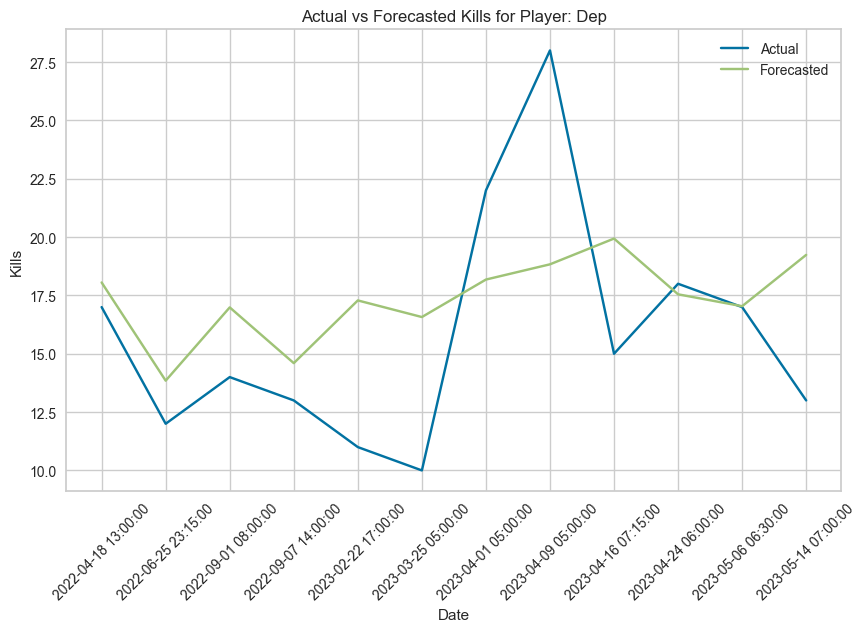

In [95]:
import matplotlib.pyplot as plt

# Filter the forecasted results for one player
player_name = 'Dep'
map_name = 'Ascent'
filtered_results = forecasted_results[(forecasted_results['Player'] == player_name) & (forecasted_results['Map'] == map_name)].sort_values('Date')


# Extract the necessary columns for plotting
dates = filtered_results['Date']
actual_values = filtered_results['Kills']
forecasted_values = filtered_results['Kills_Predicted']

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual')
plt.plot(dates, forecasted_values, label='Forecasted')
plt.xlabel('Date')
plt.ylabel('Kills')
plt.title(f'Actual vs Forecasted Kills for Player: {player_name}')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [90]:
avg_kills = filtered_results.groupby(['Map', 'Player', 'Team'])[[ 'Kills', 'Kills_Predicted']].mean()
avg_kills




Kills  Kills_Predicted
Map      Player Team                            
Ascent   BuZz   DRX   17.888889        16.834633
                RIO   20.500000        20.347850
                VS    15.000000        16.944981
Bind     BuZz   DRX   14.000000        16.457932
                RIO   29.000000        19.851949
                VS    14.750000        16.324955
Fracture BuZz   DRX   17.083333        17.041540
                VS    16.000000        15.912066
Haven    BuZz   DRX   15.187500        16.291898
                RIO   15.500000        17.531632
                VS    17.500000        17.038557
Icebox   BuZz   DRX   16.090909        17.992884
                RIO   17.500000        18.854258
                VS    14.500000        17.255457
Pearl    BuZz   DRX   13.571429        16.408502
Split    BuZz   DRX   16.666667        15.543608
                RIO   26.000000        19.385887
                VS    16.750000        17.112462